In [1]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from natsort import natsorted

In [2]:
# Set the path to the directory containing the image stacks
stack_dir = 'D:/RAW_2023-12-12(25,3)/Stacks/'

# Get a list of all TIFF files in the input directory
files = [f for f in os.listdir(stack_dir) if f.endswith('.tiff')]
print(files)

green_stack = tifffile.imread(os.path.join(stack_dir, files[1]))
red_stack = tifffile.imread(os.path.join(stack_dir, files[2]))
blue_stack = tifffile.imread(os.path.join(stack_dir, files[0]))

#Get length of image stacks
num_images_green = len(green_stack)
num_images_red = len(red_stack)
num_images_blue = len(blue_stack)
if num_images_green == num_images_red and num_images_blue:
    print("Equal stacks")    
else:
    print("unequal stacks")

num_images = num_images_green
print("stack=",num_images)

['stacked_blue_channel.tiff', 'stacked_green_channel.tiff', 'stacked_red_channel.tiff']
Equal stacks
stack= 33


In [3]:
#Loop through all red/blue pairs of images in the stacks an get the RED/GREEN intensity ratio
mean_red_intensity =[]
mean_green_intensity = []
mean_blue_intensity = []
std_red_intensity = []
std_green_intensity = []
std_blue_intensity =[]
red_green_ratio = []
mean_red_green_ratio =[]
red_green_std = []

for i in range(num_images):

    mean_red_intensity.append(np.mean(red_stack[i]))
    mean_green_intensity.append(np.mean(green_stack[i]))
    mean_blue_intensity.append(np.mean(blue_stack[i]))
    std_red_intensity.append(np.std(red_stack[i]))
    std_green_intensity.append(np.std(green_stack[i]))
    std_blue_intensity.append(np.std(blue_stack[i]))

    # Calculate the intensity ratio between the two images
    ratio = red_stack[i] / green_stack[i]
    mean_red_green_ratio.append(np.mean(ratio))
    red_green_ratio.append(ratio)
    red_green_std.append(np.std(ratio))


In [4]:
num_sections = 5

# Calculate the width of each section
section_width = red_stack.shape[2] // num_sections  # Assuming red_stack.shape is in the format of (num_images, height, width)

# Loop over each image in the ratio stack and divide it into sections
ratio_section_means = []
ratio_sections = []

for image in red_green_ratio:
    sections = [image[:, i*section_width:(i+1)*section_width] for i in range(num_sections)]
    ratio_sections.append(sections)

    # Calculate the mean ratio of each section and append it to the list
    ratio_section_mean = [np.nanmean(section) for section in sections]
    ratio_section_means.append(ratio_section_mean)

# Reshape array of mean ratios
ratio_section_means = np.reshape(ratio_section_means, (-1, num_sections))
print(ratio_section_means)

[[2.28850594 2.31510312 2.33225897 2.35392008 2.37252239]
 [1.96168774 1.98339457 1.99531989 2.01009885 2.0282269 ]
 [1.7807729  1.79610876 1.80338753 1.81364978 1.82779099]
 [1.6570898  1.67252668 1.67957028 1.68952247 1.70305584]
 [1.56028859 1.57394867 1.58100148 1.59002482 1.60261605]
 [1.49186388 1.50082533 1.50401583 1.51017247 1.52079678]
 [1.42377108 1.43514827 1.44062158 1.44748018 1.45749404]
 [1.37425197 1.38435908 1.38927526 1.39564912 1.40504111]
 [1.32868548 1.33835847 1.34377451 1.34926922 1.35712371]
 [1.29231644 1.30096815 1.30578382 1.31076463 1.31828184]
 [1.26248946 1.27039295 1.27468087 1.27916731 1.28640243]
 [2.28975144 2.31666974 2.33388106 2.35541971 2.37363537]
 [1.96070405 1.98281745 1.99474768 2.00989908 2.02782124]
 [1.784335   1.79958274 1.80649498 1.81745336 1.8321891 ]
 [1.65638229 1.67250474 1.68036815 1.69012878 1.70376936]
 [1.56030373 1.57394733 1.58133363 1.58990258 1.6020925 ]
 [1.48865575 1.49890773 1.50374742 1.51040815 1.52127969]
 [1.42408623 1

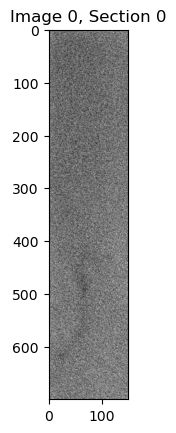

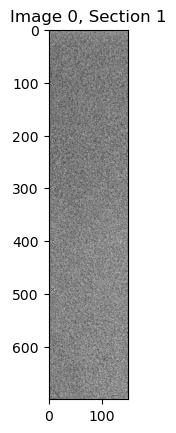

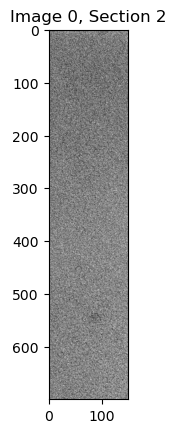

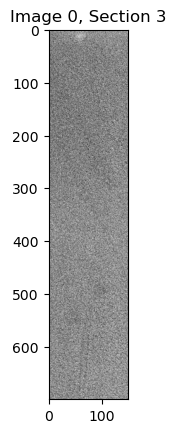

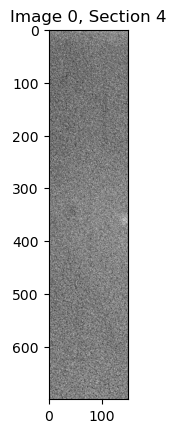

In [5]:
# Define the image index to show
image_idx = 0

# Get an example image from the green stack and its sections to see how its divided
image = red_stack[image_idx]
sections = ratio_sections[image_idx]

for section_idx in range(num_sections):
    section = sections[section_idx]
    plt.imshow(section, cmap="gray")
    plt.title(f'Image {image_idx}, Section {section_idx}')
    plt.show()


In [6]:
# Calculate the mean of means for each image and the standard deviation
ratio_mean_of_means = []
ratio_std_of_means =[]

for i in range(len(ratio_section_means)):
    mean_ratio = np.nanmean(ratio_section_means[i])
    std_ratio = np.nanstd(ratio_section_means[i])
    ratio_mean_of_means.append(mean_ratio)
    ratio_std_of_means.append(std_ratio)

print(ratio_mean_of_means)
print(ratio_std_of_means)

[2.3324620996262913, 1.9957455891954132, 1.8043419925098387, 1.6803530135933002, 1.5815759219152707, 1.5055348578769447, 1.4409030297996654, 1.3897153062473133, 1.3434422769044203, 1.3056229748872035, 1.2746266034056695, 2.3338714617836884, 1.9951978999932511, 1.8080110366174988, 1.6806306661754327, 1.5815159540159978, 1.50459974763216, 1.4414282200724347, 1.3899547024463383, 1.3437686409215028, 1.305689870654942, 1.274670736982832, 2.3338917996370405, 1.9934556589410135, 1.8120516745613937, 1.6797752252261464, 1.5822153077985723, 1.504380637835158, 1.4417927156666632, 1.3899355443876333, 1.343850593651167, 1.3056328769390877, 1.274155421211989]
[0.029321632651098793, 0.022687959337357087, 0.015878851763756866, 0.015508310221585194, 0.014322890919762259, 0.009652111840127882, 0.011359759599966131, 0.010373892619702061, 0.009642129172843704, 0.00877998330155, 0.008056364706453965, 0.02928470923006543, 0.022907252803727754, 0.016171735983605627, 0.015998103533096882, 0.014149243318236743

In [7]:
# Set the path to the directory containing the image filenames
files_dir = 'D:/RAW_2023-12-12(25,3)/'
files = [f for f in os.listdir(files_dir) if f.endswith('.tiff')]

# Sort filenames to match with stack index
files = natsorted(files)

# Initialize an empty dataframe
df_ratios = pd.DataFrame(columns=['Temperature/O2', 'Intensity Ratio', 'Intensity Red', 'Intensity Green', 'Intensity Blue', 'Std Ratio','Std Red','Std Green', 'Std Blue'])

# Add filenames and corresponding red/green ratio to the dataframe
for i in range(num_images):
    ratio_df = ratio_mean_of_means[i]
    std_df = ratio_std_of_means[i]
    blue_intensity = mean_blue_intensity[i]
    green_intensity = mean_green_intensity[i]
    red_intensity = mean_red_intensity[i]
    blue_std = std_blue_intensity[i]
    green_std = std_green_intensity[i]
    red_std = std_red_intensity[i]
    filename = os.path.splitext(files[i])[0][24:]
    numeric_num = float(filename.replace(",", ".")) 
    df_ratios.loc[i] = [numeric_num, ratio_df, red_intensity, green_intensity, blue_intensity, std_df, red_std, green_std, blue_std]

#df_ratios['Intensity Ratio'] = df_ratios['Intensity Ratio'].round(4)

# Print the dataframe
print(df_ratios)

    Temperature/O2  Intensity Ratio  Intensity Red  Intensity Green  \
0              0.0         2.332462    2087.257804       894.591646   
1             10.0         1.995746    1540.271185       771.626581   
2             20.0         1.804342    1292.813842       716.453996   
3             30.0         1.680353    1148.667819       683.535419   
4             40.0         1.581576    1045.746017       661.160581   
5             50.0         1.505535     967.964084       642.961000   
6             60.0         1.440903     907.057928       629.497752   
7             70.0         1.389715     861.053082       619.590470   
8             80.0         1.343442     820.433133       610.694810   
9             90.0         1.305623     787.579960       603.231230   
10            99.0         1.274627     763.198383       598.780278   
11             0.0         2.333871    2092.848379       896.445013   
12            10.0         1.995198    1541.851040       772.626811   
13    

In [8]:
#Save the DataFrame as a CSV file
df_ratios.to_csv('D:/RAW_2023-12-12(25,3)/red_green_ratio.csv',header=True, index=False, decimal=',')